In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('C:\\Users\\Mark\\Desktop\\CDA\\chengdu data job\\lagou_chengdu_job.csv')

In [97]:
df.head(5)

,职位,区域,公司,薪资,工作经验,企业规模,企业福利,职位关键词1,职位关键词2,职位关键词3,职位关键词4,职位关键词5,职位关键词6
0,全国大客户销售总监，金数据(成都),武侯区,AdMaster,13k-25k,13k-25k 经验5-10年 / 大专,数据服务 / 不需要融资 / 500-2000人,“发展前景好；福利待遇好”,企业服务,工具软件,大客户代表,目标管理,NaN,NaN
1,大数据工程师,高新区,成都国璀科技有限公司,15k-25k,15k-25k 经验5-10年 / 本科,"移动互联网,电子商务 / 不需要融资 / 50-150人",“晋升、带薪年休、旅游、福利体检、节日福利”,Spark,数据挖掘,数据仓库,数据分析,NaN,NaN
2,JAVA工程师 - 成都 - 大数据/容器相关,高新区,四川长虹电器股份有限公司,9k-15k,9k-15k 经验3-5年 / 本科,硬件 / 上市公司 / 2000人以上,"“五险一金,带薪年假”",绩效奖金,管理规范,定期体检,五险一金,NaN,NaN
3,软件工程师 - 大数据方向,高新区,大地量子,15k-25k,15k-25k 经验3-5年 / 本科,数据服务 / 天使轮 / 15-50人,"“氛围好,前沿科技,福利多多,人nice”",Spark,Hadoop,Scala,NaN,NaN,NaN
4,生物信息工程师/基因数据分析师 （流程维护/数据质,高新区,23魔方,15k-30k,15k-30k 经验3-5年 / 硕士,"医疗健康,数据服务 / B轮 / 50-150人","“六险一金,免费下午茶,期权激励,行业前景好”",年度旅游,弹性工作,六险一金,定期体检,NaN,NaN


data clean

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 13 columns):
职位        324 non-null object
区域        324 non-null object
公司        324 non-null object
薪资        324 non-null object
工作经验      324 non-null object
企业规模      324 non-null object
企业福利      324 non-null object
职位关键词1    322 non-null object
职位关键词2    253 non-null object
职位关键词3    184 non-null object
职位关键词4    113 non-null object
职位关键词5    38 non-null object
职位关键词6    14 non-null object
dtypes: object(13)
memory usage: 33.0+ KB


区域

In [99]:
df['区域'].value_counts()

高新区     192
武侯区      28
锦江区      17
玉林        8
春熙路       7
桂溪        5
青羊区       4
中和        4
石羊        4
成都        4
火车南站      4
跳伞塔       4
犀浦        3
华阳        3
柳江        3
建设路       3
金泉        3
天府广场      3
盐市口       2
金牛区       2
四川大学      2
牛王庙       2
三圣        2
光华        2
双流区       2
九眼桥       1
红牌楼       1
创业路       1
沙河源       1
圣灯        1
沙湾        1
成华区       1
青羊大道      1
郫县        1
科华北路      1
肖家河       1
Name: 区域, dtype: int64

In [100]:
area_mapDict = {
                    "玉林":       "武侯区",
                    "春熙路":        "锦江区",
                    "桂溪":      "武侯区",
                    "中和":   "双流区",
                    "石羊":        "武侯区",
                    "火车南站" :       "武侯区",
                    "跳伞塔":         "武侯区",
                    "建设路":        "成华区",
                    "天府广场": "青羊区",
                    "犀浦":       "郫都区",
                    "金泉":        "金牛区",
                    "柳江":       "锦江区",
                    "盐市口":         "锦江区",
                    "牛王庙" :        "锦江区",
                    "三圣 " :       "锦江区",
                    "光华 " :      "青羊区",
                    "红牌楼" :    "武侯区",
                    "青羊大道" :      "青羊区",
                    "沙湾" :      "金牛区",
                    "科华北路" :      "武侯区",
                    "肖家河" :      "武侯区",
                    "沙河源" :      "金牛区",
                    "郫县" :      "郫都区",
                    "圣灯  " :      "成华区",
                    "创业路" :    "武侯区",
                    "九眼桥" :      "武侯区",
                    "高新区" :      "高新区",
                    "武侯区" :      "武侯区",
                    "锦江区" :      "锦江区",
                    "青羊区" :      "青羊区",
                    "双流区" :      "双流区",
                    "金牛区" :      "金牛区",
                    "成华区" :      "成华区"
                    }

In [101]:
df['area'] = df['区域'].map(area_mapDict)

In [102]:
df['area'].value_counts()

高新区    192
武侯区     58
锦江区     31
青羊区      8
金牛区      7
双流区      6
郫都区      4
成华区      4
Name: area, dtype: int64

学历

In [103]:
def get_degree(degree):
    str1 = degree.split('/')[1]
    str2 = str1.strip()
    return str2

In [104]:
df['degree'] = df['工作经验'].apply(get_degree)

In [105]:
df['degree'].value_counts()

本科    250
大专     35
不限     21
硕士     18
Name: degree, dtype: int64

工作经历

In [106]:
def get_experience(experience):
    str1 = experience.split('经验')[1]
    str2 = str1.split('/')[0]
    str3 = str2.strip()
    return str3

In [107]:
df['experience'] = df['工作经验'].apply(get_experience)

In [108]:
df['experience'].value_counts()

3-5年     139
1-3年      83
5-10年     43
不限        41
应届毕业生     11
1年以下       6
10年以上      1
Name: experience, dtype: int64

行业

In [109]:
def get_industry(industry):
    str1 = industry.split('/')[0]
    return str1

In [110]:
df['industry_all'] = df['企业规模'].apply(get_industry)

In [111]:
df['industry_all'][1]

'移动互联网,电子商务 '

In [116]:
import re    # re.split  多个分隔符的拆分
def get_industry3(word):
    new_list  = []
    for i in word:
        content = re.split(',| |、',i)
        for j in content:
            new_list.append(j)
    return new_list

In [117]:
indu_list = df['industry_all']

In [118]:
indu_list1 = list(indu_list)

In [119]:
indu_list2 = get_industry3(indu_list1)

In [129]:
indu_list3 = pd.Series(indu_list2)

In [ ]:
indu_list4 = list(indu_list3)

In [131]:
while '' in indu_list4:
    indu_list4.remove('')

In [134]:
indu_list4 

['数据服务',
 '移动互联网',
 '电子商务',
 '硬件',
 '数据服务',
 '医疗健康',
 '数据服务',
 '电子商务',
 '信息安全',
 '其他',
 '电子商务',
 '硬件',
 '金融',
 '教育',
 '移动互联网',
 '其他',
 '移动互联网',
 '金融',
 '金融',
 '移动互联网',
 '数据服务',
 '电子商务',
 '其他',
 '金融',
 '移动互联网',
 '企业服务',
 '移动互联网',
 '电子商务',
 '移动互联网',
 '移动互联网',
 '数据服务',
 '电子商务',
 '企业服务',
 '数据服务',
 '金融',
 '企业服务',
 '移动互联网',
 '其他',
 '移动互联网',
 '硬件',
 '移动互联网',
 '电子商务',
 '企业服务',
 '数据服务',
 '数据服务',
 '移动互联网',
 '企业服务',
 '金融',
 '移动互联网',
 '移动互联网',
 '医疗健康',
 '移动互联网',
 '其他',
 '移动互联网',
 '电子商务',
 '电子商务',
 '数据服务',
 'O2O',
 '企业服务',
 '数据服务',
 '数据服务',
 '金融',
 '企业服务',
 '数据服务',
 '移动互联网',
 '社交网络',
 '电子商务',
 '企业服务',
 '医疗健康',
 '信息安全',
 '移动互联网',
 '金融',
 '移动互联网',
 '硬件',
 '电子商务',
 '数据服务',
 '移动互联网',
 '数据服务',
 '数据服务',
 '其他',
 '金融',
 '移动互联网',
 '金融',
 '医疗健康',
 '信息安全',
 '金融',
 '其他',
 '游戏',
 '移动互联网',
 '移动互联网',
 '移动互联网',
 'O2O',
 '移动互联网',
 '电子商务',
 '移动互联网',
 '移动互联网',
 '数据服务',
 '游戏',
 '电子商务',
 '数据服务',
 '移动互联网',
 'O2O',
 '金融',
 '移动互联网',
 '电子商务',
 '金融',
 '企业服务',
 '数据服务',
 '移动互联网',
 '教育',
 '移动互联网',
 '医疗健康',
 '数据服务',
 '移动互联网',
 

In [136]:
indu_list5 = pd.Series(indu_list4)

In [137]:
indu_list5.value_counts()

移动互联网    147
数据服务      85
电子商务      55
金融        52
其他        29
企业服务      29
O2O       22
信息安全      17
医疗健康      16
游戏        14
硬件        12
教育        10
社交网络       6
人工智能       5
生活服务       5
招聘         1
文化娱乐       1
广告营销       1
dtype: int64

In [138]:
df_industry = indu_list5.value_counts()

平均薪资

In [140]:
# 顶薪
def cut_top(word):
    position = word.find('-')   # find函数，当返回值不是括号的里的值时，返回-1
    lenth = len(word)
    if position != -1:
        bottomsalary = word[:position-1]  # posotion-1 不包含 position-1 对应的值
        topsalary = word[position+1:lenth-1]
    else:
        bottomsalary = word[:word.upper().find('K')]
        topsalary = bottomsalary
    return topsalary

In [141]:
df['top_salary'] = df['薪资'].apply(cut_top)

In [142]:
df['top_salary'].head()

0    25
1    25
2    15
3    25
4    30
Name: top_salary, dtype: object

In [143]:
#  底薪  
def cut_bottom(word):
    position = word.find('-')   # find函数，当返回值不是括号的里的值时，返回-1
    lenth = len(word)
    if position != -1:
        bottomsalary = word[:position-1]  # posotion-1 不包含 position-1 对应的值
        topsalary = word[position+1:lenth-1]
    else:
        bottomsalary = word[:word.upper().find('K')]
        topsalary = bottomsalary
    return bottomsalary

In [144]:
df['bottom_salary'] = df['薪资'].apply(cut_bottom)

In [145]:
df['bottom_salary'].head()

0    13
1    15
2     9
3    15
4    15
Name: bottom_salary, dtype: object

In [146]:
# 平均薪资
df['top_salary'] = df.top_salary.astype('int')
df['bottom_salary'] = df.bottom_salary.astype('int')
df['avg_salary'] = df.apply(lambda x :(x.top_salary+x.bottom_salary)/2, axis = 1)

In [147]:
df.head(1)

,职位,区域,公司,薪资,工作经验,企业规模,企业福利,职位关键词1,职位关键词2,职位关键词3,职位关键词4,职位关键词5,职位关键词6,area,degree,experience,industry_all,top_salary,bottom_salary,avg_salary
0,全国大客户销售总监，金数据(成都),武侯区,AdMaster,13k-25k,13k-25k 经验5-10年 / 大专,数据服务 / 不需要融资 / 500-2000人,“发展前景好；福利待遇好”,企业服务,工具软件,大客户代表,目标管理,NaN,NaN,武侯区,大专,5-10年,数据服务,25,13,19.0


各地区的相关招聘数量

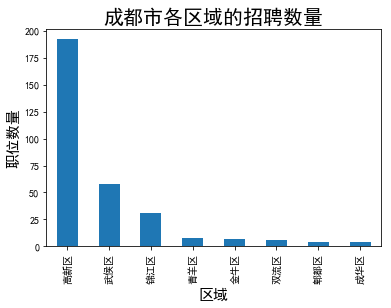

In [148]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False #中文输出
df_area = df['area'].value_counts()
df_area.plot.bar()
plt.xlabel('区域', fontsize = 15)
plt.ylabel('职位数量', fontsize = 15)
plt.title('成都市各区域的招聘数量', fontsize = 20)
plt.show()

各地区的平均薪资

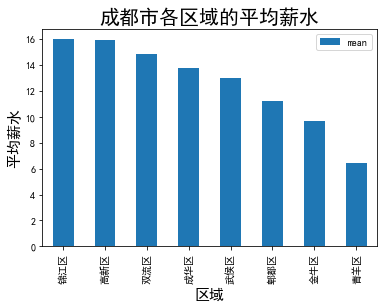

In [149]:
df_avg_salary = df.groupby('area').avg_salary.agg(['mean']).sort_values(by = 'mean', ascending = False)
df_avg_salary.plot.bar()
plt.xlabel('区域', fontsize = 15)
plt.ylabel('平均薪水', fontsize = 15)
plt.title('成都市各区域的平均薪水', fontsize = 20)
plt.show()

学历的平均薪水

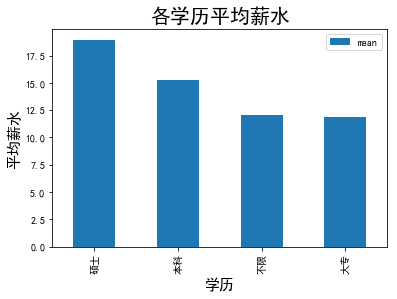

In [150]:
df_degree = df.groupby('degree').avg_salary.agg(['mean']).sort_values(by = 'mean', ascending = False)
df_degree.plot.bar()
plt.xlabel('学历', fontsize = 15)
plt.ylabel('平均薪水', fontsize = 15)
plt.title('各学历平均薪水', fontsize = 20)
plt.show()

不同学历的平均薪水

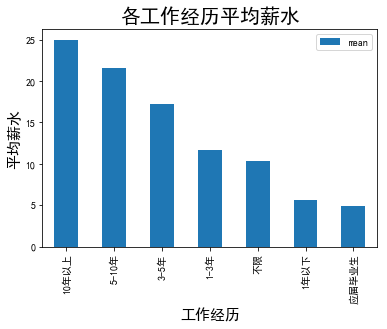

In [151]:
df_experience = df.groupby('experience').avg_salary.agg(['mean']).sort_values(by = 'mean', ascending =  False)
df_experience.plot.bar()
plt.xlabel('工作经历', fontsize = 15)
plt.ylabel('平均薪水', fontsize = 15)
plt.title('各工作经历平均薪水', fontsize = 20)
plt.show()

招聘薪资前10的公司

In [160]:
df.groupby('公司').avg_salary.agg(['mean','count']).sort_values(by = 'count', ascending = False).head(10)

,mean,count
公司,,
多点Dmall,21.722222,9
货车帮,21.071429,7
有利网,14.714286,7
知道创宇,14.928571,7
成都启迪,7.700000,5
BBD,14.900000,5
国研网,12.000000,5
四川长虹电器股份有限公司,15.875000,4
希望金科,21.000000,4


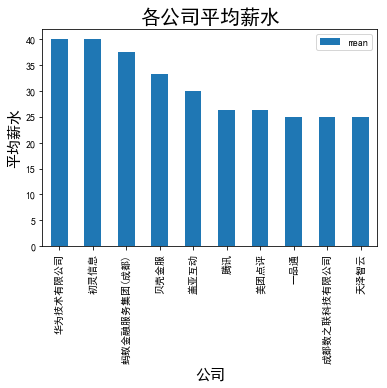

In [161]:
df_company = df.groupby('公司').avg_salary.agg(['mean']).sort_values(by = 'mean', ascending = False).head(10)
df_company.plot.bar()
plt.xlabel('公司', fontsize = 15)
plt.ylabel('平均薪水', fontsize = 15)
plt.title('各公司平均薪水', fontsize = 20)
plt.show()

分桶分析-各区域不同薪资的比例

In [163]:
bins = [0,3,5,10,15,20,30,100]
level = ['0-3', '3-5', '5-10', '10-15', '15-20', '20-30', '30+']
df['level'] = pd.cut(df['avg_salary'], bins = bins, labels = level)
df[['avg_salary', 'level']].head()   # 为什么必须两个中括号？？？

,avg_salary,level
0,19.0,15-20
1,20.0,15-20
2,12.0,10-15
3,20.0,15-20
4,22.5,20-30


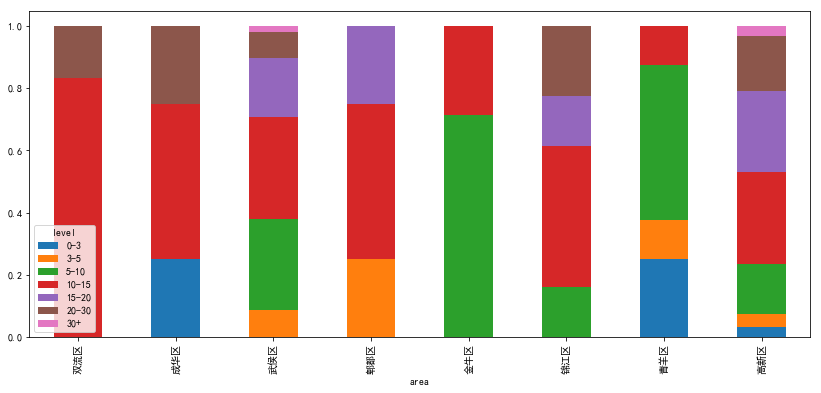

In [164]:
df_level = df.groupby(['area','level']).avg_salary.count().unstack()
df_level_prop = df_level.apply(lambda x: x/x.sum(), axis = 1)
df_level_prop.plot.bar(stacked = True, figsize = (14,6))
plt.show()

分桶分析-不同学历的不同薪资比例

In [165]:
df[['degree','level']].head()

,degree,level
0,大专,15-20
1,本科,15-20
2,本科,10-15
3,本科,15-20
4,硕士,20-30


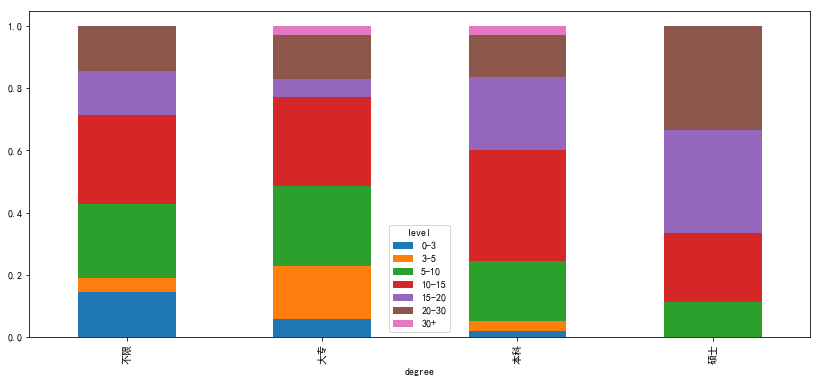

In [166]:
df_degree_level = df.groupby(['degree','level']).avg_salary.count().unstack()
df_level_prop = df_degree_level.apply(lambda x: x/x.sum(), axis = 1)
df_level_prop.plot.bar(stacked = True, figsize = (14,6))
plt.show()

分桶分析-不同工作经验的不同薪资比例

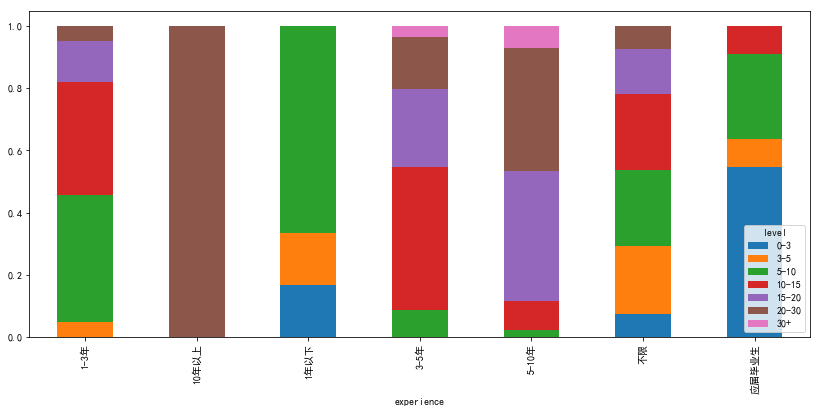

In [167]:
df_experience_level = df.groupby(['experience','level']).avg_salary.count().unstack()
df_level_prop = df_experience_level.apply(lambda x: x/x.sum(), axis = 1)
df_level_prop.plot.bar(stacked = True, figsize = (14,6))
plt.show()